In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import shutil

In [3]:
print(sys.executable)

/Users/anveshradharapu/Library/Caches/pypoetry/virtualenvs/mlengineerprep-fSSVlCLJ-py3.11/bin/python


In [4]:
os.chdir("..")
sys.path.append("data")
sys.path.append("src")
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [5]:
import tensorflow as tf
print(tf.__version__)

2.14.1


In [6]:
from data_pipeline import extract_data, load_data, build_model, zip_folder
from evaluation import extract_features, recommend_similar, show_images, evaluate_model

In [7]:
# extract_data("data/images.zip", "data/reduced_dataset", images_per_class=9, random_selection=True)

In [8]:
train, val = load_data("data/data")

model = build_model(num_classes=train.num_classes)
history = model.fit(train, validation_data=val, epochs=10)

model.save("models/art_style_classifier.h5")


Extracting data/data...
Found 400 images belonging to 50 classes.
Found 50 images belonging to 50 classes.


Epoch 1/10
13/13 [==============================] - 3s 192ms/step - loss: 4.2315 - accuracy: 0.0125 - val_loss: 4.1589 - val_accuracy: 0.0200
Epoch 2/10
13/13 [==============================] - 2s 158ms/step - loss: 3.8628 - accuracy: 0.0425 - val_loss: 4.0264 - val_accuracy: 0.0600
Epoch 3/10
13/13 [==============================] - 2s 176ms/step - loss: 3.6264 - accuracy: 0.1025 - val_loss: 3.9398 - val_accuracy: 0.0800
Epoch 4/10
13/13 [==============================] - 2s 165ms/step - loss: 3.4181 - accuracy: 0.1725 - val_loss: 3.8791 - val_accuracy: 0.1000
Epoch 5/10
13/13 [==============================] - 2s 162ms/step - loss: 3.2258 - accuracy: 0.2575 - val_loss: 3.8118 - val_accuracy: 0.1000
Epoch 6/10
13/13 [==============================] - 2s 186ms/step - loss: 3.0308 - accuracy: 0.3350 - val_loss: 3.7520 - val_accuracy: 0.1000
Epoch 7/10
13/13 [==============================] - 2s 163ms/step - loss: 2.8471 - accuracy: 0.4025 - val_loss: 3.6906 - val_accuracy: 0.1200
Epoch 

/Users/anveshradharapu/Library/Caches/pypoetry/virtualenvs/mlengineerprep-fSSVlCLJ-py3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 327ms/step


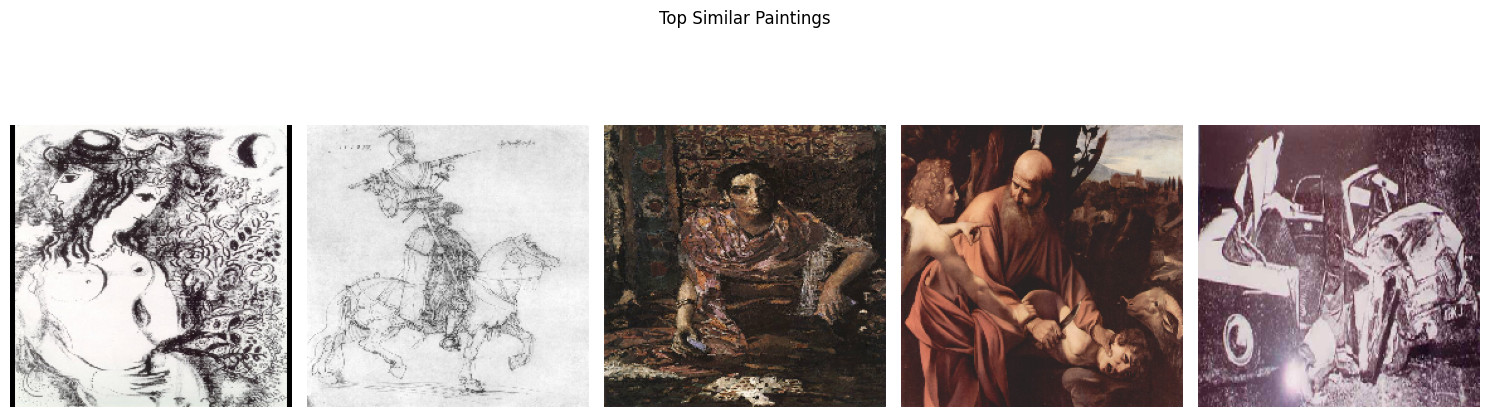

In [9]:
features, labels, images = extract_features(model, val)
index = 15  # any image from validation set
similar_idxs, sims = recommend_similar(features, index)

show_images(similar_idxs, images, title="Top Similar Paintings", path="outputs/similar_paintings.png")


/Users/anveshradharapu/Library/Caches/pypoetry/virtualenvs/mlengineerprep-fSSVlCLJ-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
/Users/anveshradharapu/Library/Caches/pypoetry/virtualenvs/mlengineerprep-fSSVlCLJ-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
/Users/anveshradharapu/Library/Caches/pypoetry/virtualenvs/mlengineerprep-fSSVlCLJ-py3.11/lib/python3.11/site-packages/sklearn/utils/multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
/Users/anveshradharapu/Library/Caches/pypoetry/virtualenvs/mlengineerprep-fSSVlCLJ-py3.11/lib/python3.11/

✅ Accuracy: 0.0000

📊 Classification Report:
                           precision    recall  f1-score   support

         Albrecht_Du╠êrer       0.00      0.00      0.00       1.0
            Alfred_Sisley       0.00      0.00      0.00       1.0
        Amedeo_Modigliani       0.00      0.00      0.00       1.0
            Andrei_Rublev       0.00      0.00      0.00       1.0
              Andy_Warhol       0.00      0.00      0.00       1.0
         Camille_Pissarro       0.00      0.00      0.00       1.0
               Caravaggio       0.00      0.00      0.00       1.0
             Claude_Monet       0.00      0.00      0.00       1.0
             Diego_Rivera       0.00      0.00      0.00       1.0
          Diego_Velazquez       0.00      0.00      0.00       1.0
              Edgar_Degas       0.00      0.00      0.00       1.0
            Edouard_Manet       0.00      0.00      0.00       1.0
             Edvard_Munch       0.00      0.00      0.00       1.0
                

/Users/anveshradharapu/Documents/Project_Space/ML Engineer/MLEngineerPrep/Machine Learning Specialization/Unsupervised Machine Learning/Art Style Classifier/src/evaluation.py:87: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.savefig(cm_path)
/Users/anveshradharapu/Library/Caches/pypoetry/virtualenvs/mlengineerprep-fSSVlCLJ-py3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


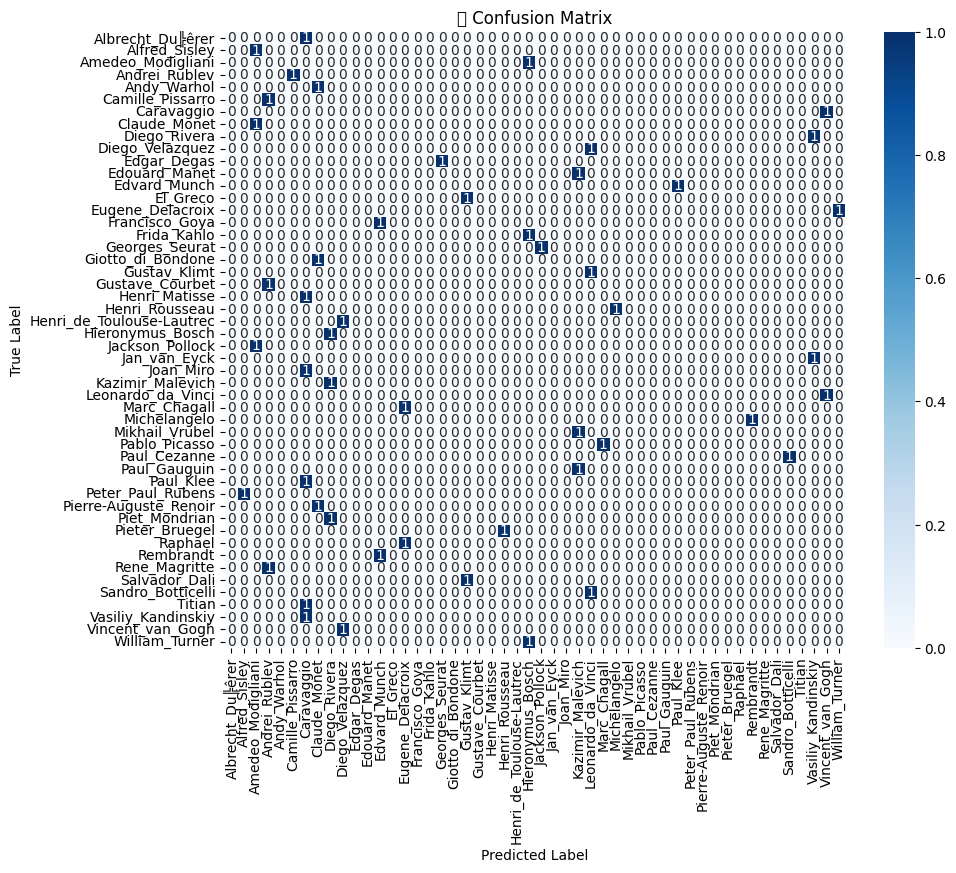

🖼️ Confusion matrix saved to: outputs/confusion_matrix.png
🔁 Top-2 Accuracy: 0.0400
🔁 Top-3 Accuracy: 0.0600


In [10]:
# Use validation generator and class names
class_names = list(val.class_indices.keys())
metrics = evaluate_model(model, val, class_names, output_dir="outputs")

In [11]:
zip_folder("data/data")
shutil.rmtree("data/data")